In [188]:
import os
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets.base import get_data_home
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [189]:
# Download the dataset if not present 
news_groups_dataset = fetch_20newsgroups(subset='all', shuffle=True, download_if_missing=False)

texts = news_groups_dataset.data 
target = news_groups_dataset.target

In [190]:
vectorizer = TfidfVectorizer(max_df = 0.50, min_df=0.01,stop_words='english')
train_text = vectorizer.fit_transform(texts)

In [191]:
# Save vectorizer as the pickle file 
import pickle 

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [192]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

AttributeError: 'numpy.ndarray' object has no attribute 'cluster_centers_'

In [52]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(train_text)
    wcss.append(kmeans.inertia_)

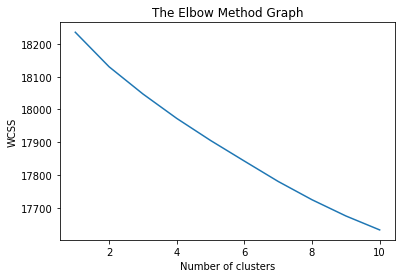

In [155]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [193]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, 
               init='k-means++', 
               max_iter=100,
               n_init=1) 
kmeans.fit(train_text)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [194]:
with open('kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [195]:
centroids = kmeans.cluster_centers_.argsort()[:, ::-1]


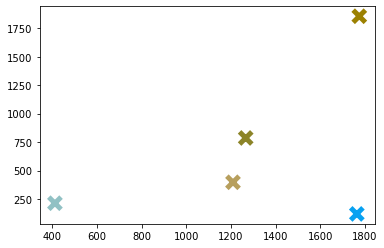

In [197]:
# Centroids of training text data 
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
colors = get_colors(5)
plt.scatter(centroids[:,0],centroids[:,1],marker = "x", s=150,linewidths = 5, zorder = 10, c = colors)

In [187]:
X = vectorizer.transform([texts[100], texts[150]])


IndexError: list index out of range

In [111]:
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))

test_data = [
    'Affidavit of Identity',
    'Arbitration Agreement',
    'Business Contract',
    'Constitution of the United States',
    'The Pledge of Allegiance',
    'Identifying student misconceptions of programming',
    'What should we teach in an introductory programming cours',
    'Teaching objects-first in introductory computer science',
    'law',
    'issue',
    'space',
    'rocket'
]
test_data = list(map(lambda x: x.lower(), test_data))
Y = vectorizer.transform(test_data)

In [112]:
cluster = kmeans.predict(Y)

In [166]:
import os 

In [201]:
path = "dataset"
files = os.listdir('dataset')
texts = [] 
index = 0 
for file in files:
    if index == 5:
        break;
    f = open(f"{path}/{file}","r")
    texts.append(f.read())
    f.close()
    index += 1

In [206]:
test_data = list(map(lambda x: x.lower(), texts))
Y = vectorizer.transform(test_data)

In [207]:
y_kmeans = kmeans.predict(Y)
cluster

array([ 6, 11,  6,  9,  8,  6,  4,  6, 11, 11,  3,  8], dtype=int32)

In [208]:
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
colors = get_colors(5)